# Student grades prediction

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years

# Import Dataset

In [3]:
df=pd.read_csv("grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.sample(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
548,CS-97549,A,A,A,A,C+,A,B+,C,B+,...,B,B,B,B,B-,A-,A,C+,B,3.182
487,CS-97488,B,C,A,B+,B-,A,B,B-,B+,...,B+,B,A,C,B,A-,A,B-,B+,3.114
382,CS-97383,D,C,D,D,B,B-,B+,D+,D,...,C+,C-,D+,F,C+,F,D+,B+,NaN,1.826
198,CS-97199,C,B,A-,D+,C+,A-,C-,D,C-,...,C,D+,D+,D,B-,A-,D+,D,B-,1.992
473,CS-97474,A-,C,A,A,B,A,B+,C,B+,...,A,C+,A,B,B,B+,B+,B,B-,3.019


In [6]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


# Exploratory Data Analysis

In [7]:
df.shape

(571, 43)

In [8]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [10]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<Axes: >

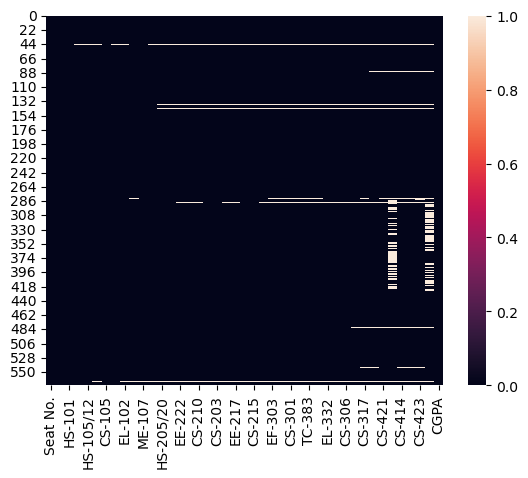

In [11]:
sns.heatmap(df.isnull())

In [12]:
# To check Cs-97045 has so many null values 
df.iloc[44:45,:]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493


But there showing allready Nan Value in it 

In [13]:
# Changing Nan Value to zero
df.replace(np.nan,0,inplace=True)
df.iloc[44:45,:]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,0,0,0,C-,0,0,D+,...,0,0,0,0,0,0,0,0,0,1.493


In [14]:
#Input and Target Variable seperated
input=df.drop([ 'MT-442','CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'Seat No.' , 'CGPA'], axis=1)
target=df["CGPA"]

In [15]:
input

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C+,B,C,C+,C,C-,C,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,C-,A-,D+,C-,C,A-,D,D+,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,C+,A,B+,A-,B,B+,A-,A-,B,B
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D,B-,D,B-,D+,D+,B+,C-,D+,C
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,C-,A-,B-,A-,C+,A-,B-,A-,B-,B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B,A-,A-,A,A+,A,A,B+,A-,A-
567,A+,A,A,A,A,A,A,A-,A,A,...,A,A,A,A,A,A,A+,A-,B+,B+
568,B,A,A-,B+,A,A,A,A,A,B,...,B,B-,B+,B+,A,B,C+,B+,A-,B
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,C,C,C+,C-,D,B-,B+,D,B


In [16]:
target.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [24]:
# Check Unique value
pd.unique(df['PH-121'])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [25]:
# Taking Grades in No
grades_no={'B-':2.4, 'A':4.5, 'D':0.8, 'A-':3.9, 'B+':3.3, 'B':2.8, 'C+':1.9, 'C':1.6, 'C-':1.3, 'D+':1.0, 'W':0.4, 'WU':0.0, 'A+':5.0, 'F':0.6, 'I':0.2}

In [26]:
for i in input:
    input[i]=input[i].replace(grades_no)
    
input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.4,1.0,1.3,1.6,1.3,1.0,0.8,1.3,2.4,1.3,...,1.3,1.9,2.8,1.6,1.9,1.6,1.3,1.6,1.3,1.3
1,4.5,0.8,1.0,0.8,2.4,1.6,0.8,4.5,1.0,0.8,...,0.8,1.3,3.9,1.0,1.3,1.6,3.9,0.8,1.0,0.8
2,4.5,2.8,4.5,2.4,3.3,4.5,2.4,3.3,3.9,3.9,...,1.9,4.5,3.3,3.9,2.8,3.3,3.9,3.9,2.8,2.8
3,0.8,1.9,1.0,0.8,0.8,3.9,1.0,1.3,0.8,1.9,...,0.8,2.4,0.8,2.4,1.0,1.0,3.3,1.3,1.0,1.6
4,3.9,3.9,3.9,3.3,4.5,4.5,3.9,3.3,4.5,3.9,...,1.3,3.9,2.4,3.9,1.9,3.9,2.4,3.9,2.4,3.3


In [27]:
# merge Input and Target
df=pd.concat([input,target],axis=1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.4,1.0,1.3,1.6,1.3,1.0,0.8,1.3,2.4,1.3,...,1.9,2.8,1.6,1.9,1.6,1.3,1.6,1.3,1.3,2.205
1,4.5,0.8,1.0,0.8,2.4,1.6,0.8,4.5,1.0,0.8,...,1.3,3.9,1.0,1.3,1.6,3.9,0.8,1.0,0.8,2.008
2,4.5,2.8,4.5,2.4,3.3,4.5,2.4,3.3,3.9,3.9,...,4.5,3.3,3.9,2.8,3.3,3.9,3.9,2.8,2.8,3.608
3,0.8,1.9,1.0,0.8,0.8,3.9,1.0,1.3,0.8,1.9,...,2.4,0.8,2.4,1.0,1.0,3.3,1.3,1.0,1.6,1.906
4,3.9,3.9,3.9,3.3,4.5,4.5,3.9,3.3,4.5,3.9,...,3.9,2.4,3.9,1.9,3.9,2.4,3.9,2.4,3.3,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2.8,4.5,4.5,3.9,5.0,4.5,3.9,3.9,5.0,3.3,...,3.9,3.9,4.5,5.0,4.5,4.5,3.3,3.9,3.9,3.798
567,5.0,4.5,4.5,4.5,4.5,4.5,4.5,3.9,4.5,4.5,...,4.5,4.5,4.5,4.5,4.5,5.0,3.9,3.3,3.3,3.772
568,2.8,4.5,3.9,3.3,4.5,4.5,4.5,4.5,4.5,2.8,...,2.4,3.3,3.3,4.5,2.8,1.9,3.3,3.9,2.8,3.470
569,4.5,3.3,0.8,4.5,0.8,1.0,2.4,1.3,2.4,1.3,...,1.6,1.6,1.9,1.3,0.8,2.4,3.3,0.8,2.8,2.193


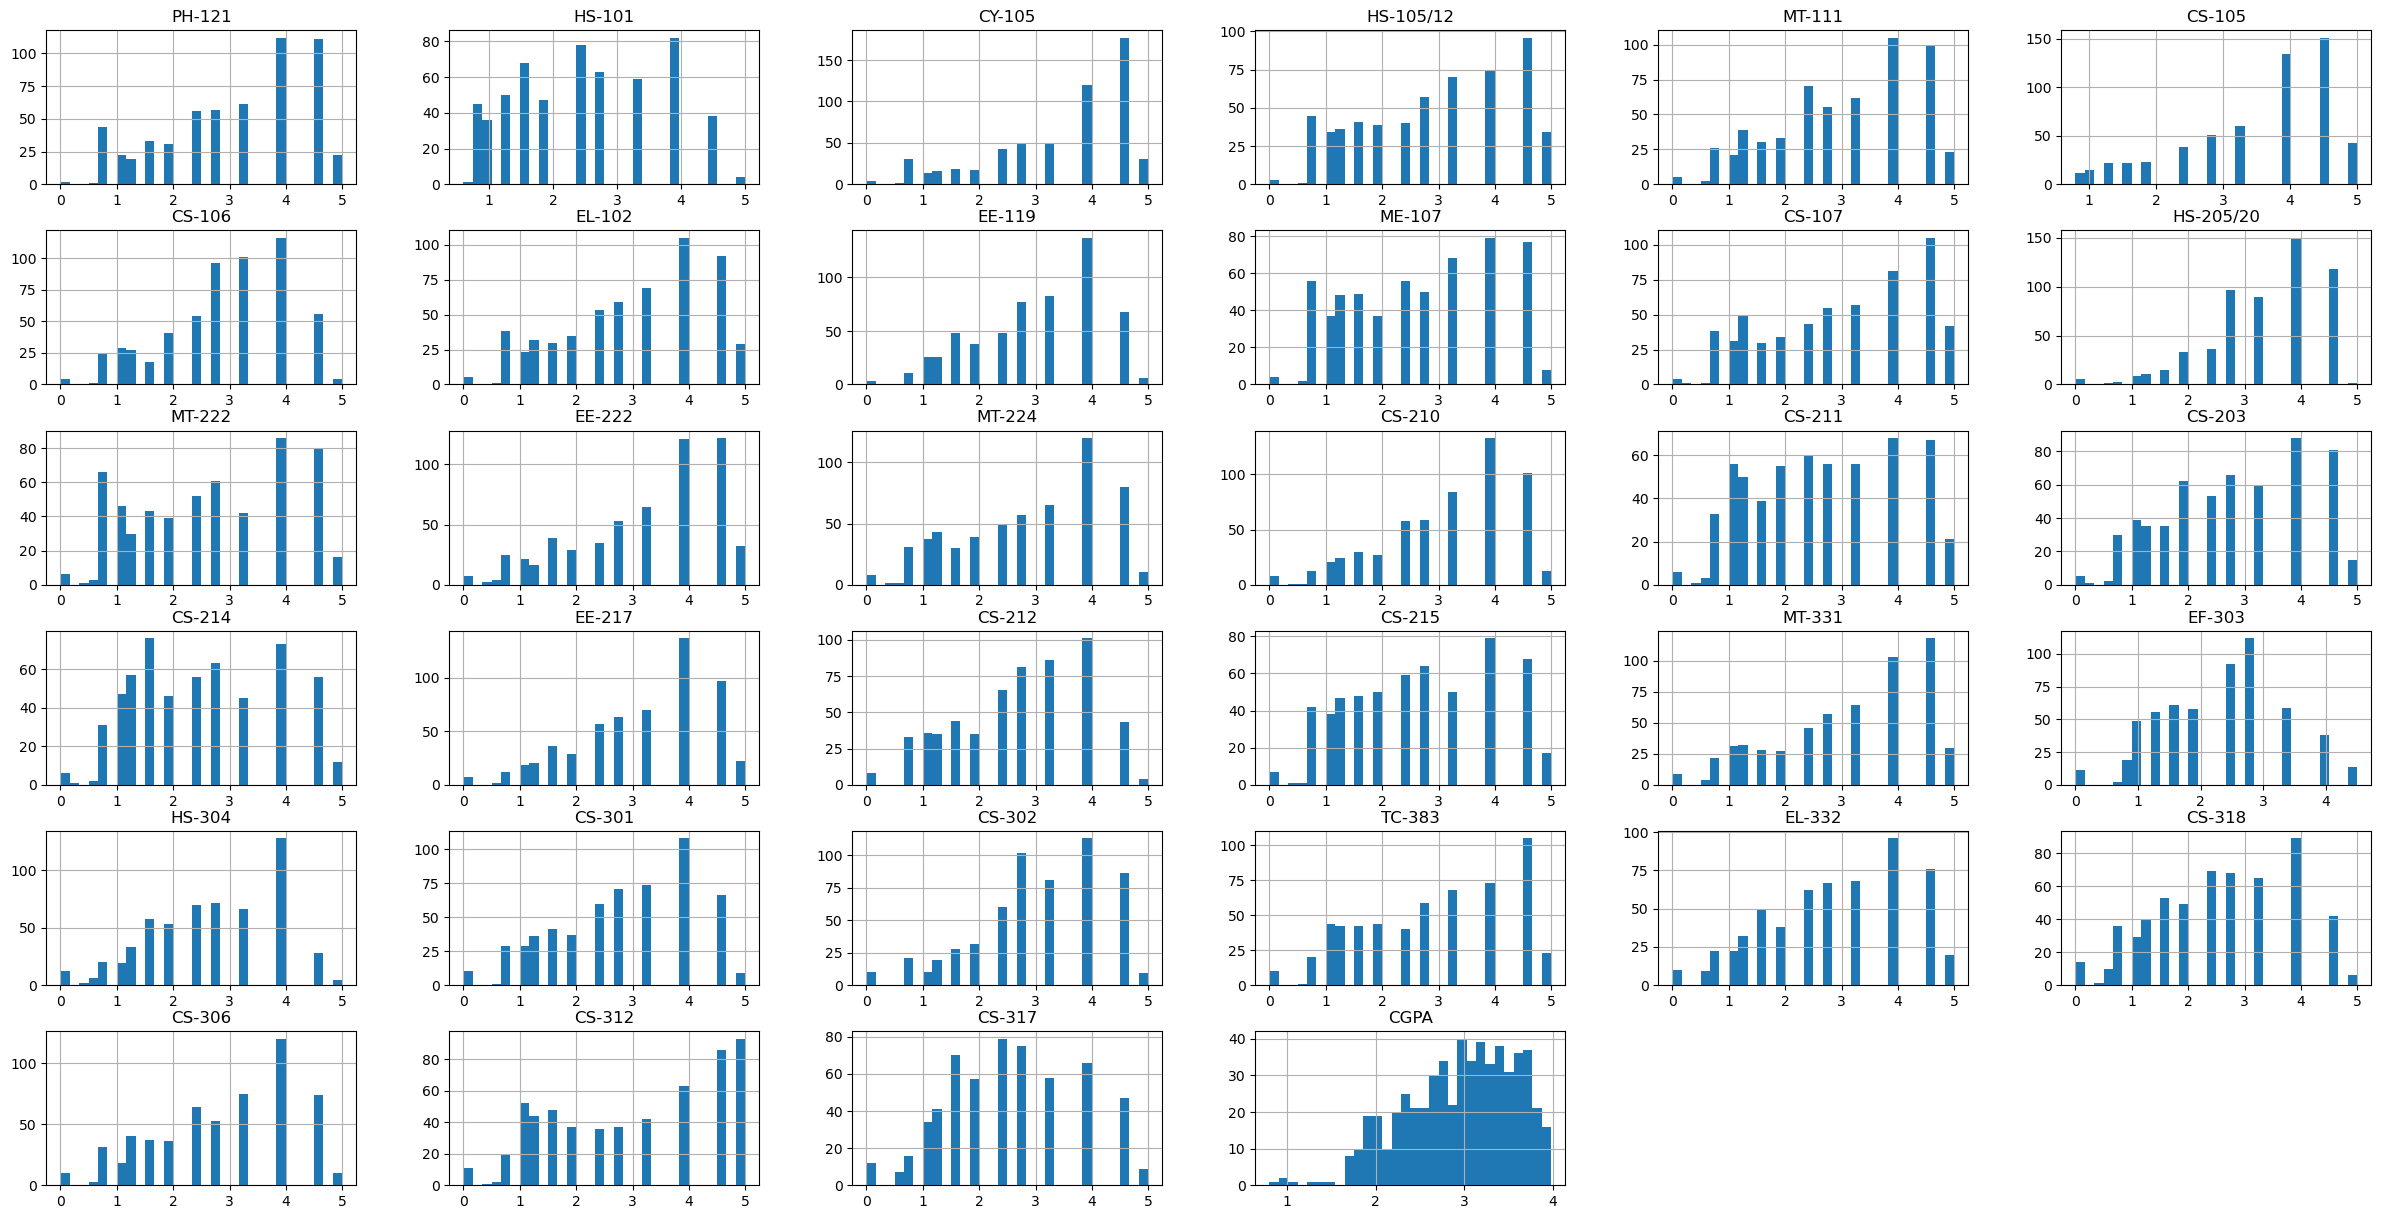

In [28]:
# Histogram
df.hist(bins=30,figsize=(30,15))
plt.show()

PH-121          Axes(0.125,0.814746;0.168478x0.0652542)
HS-101       Axes(0.327174,0.814746;0.168478x0.0652542)
CY-105       Axes(0.529348,0.814746;0.168478x0.0652542)
HS-105/12    Axes(0.731522,0.814746;0.168478x0.0652542)
MT-111          Axes(0.125,0.736441;0.168478x0.0652542)
CS-105       Axes(0.327174,0.736441;0.168478x0.0652542)
CS-106       Axes(0.529348,0.736441;0.168478x0.0652542)
EL-102       Axes(0.731522,0.736441;0.168478x0.0652542)
EE-119          Axes(0.125,0.658136;0.168478x0.0652542)
ME-107       Axes(0.327174,0.658136;0.168478x0.0652542)
CS-107       Axes(0.529348,0.658136;0.168478x0.0652542)
HS-205/20    Axes(0.731522,0.658136;0.168478x0.0652542)
MT-222          Axes(0.125,0.579831;0.168478x0.0652542)
EE-222       Axes(0.327174,0.579831;0.168478x0.0652542)
MT-224       Axes(0.529348,0.579831;0.168478x0.0652542)
CS-210       Axes(0.731522,0.579831;0.168478x0.0652542)
CS-211          Axes(0.125,0.501525;0.168478x0.0652542)
CS-203       Axes(0.327174,0.501525;0.168478x0.0

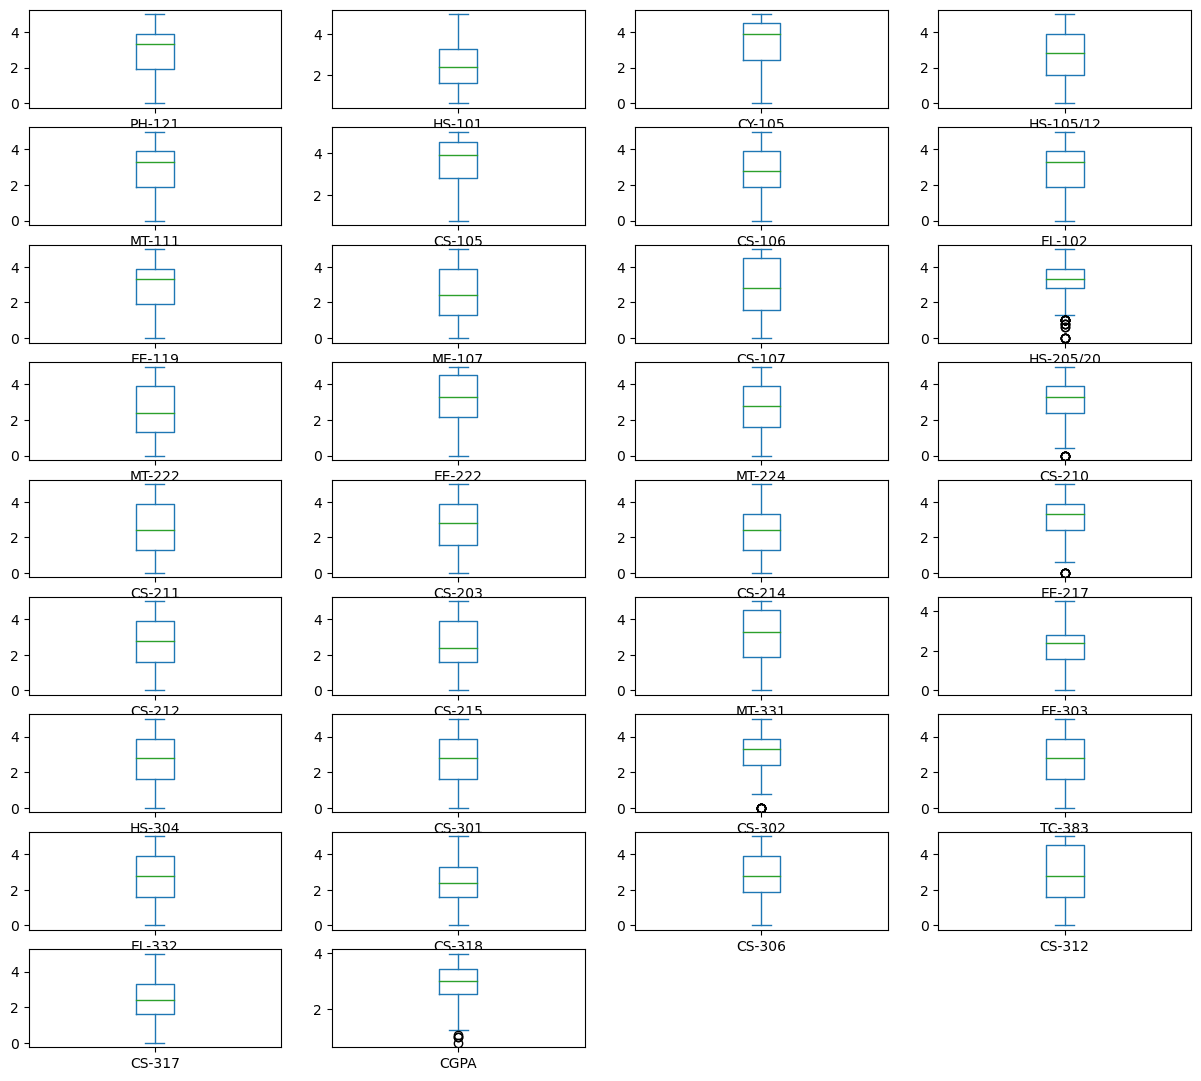

In [35]:
# BoxPlot
df.plot(kind='box',subplots=True ,layout=(10,4) ,figsize=(15,15))

<Axes: >

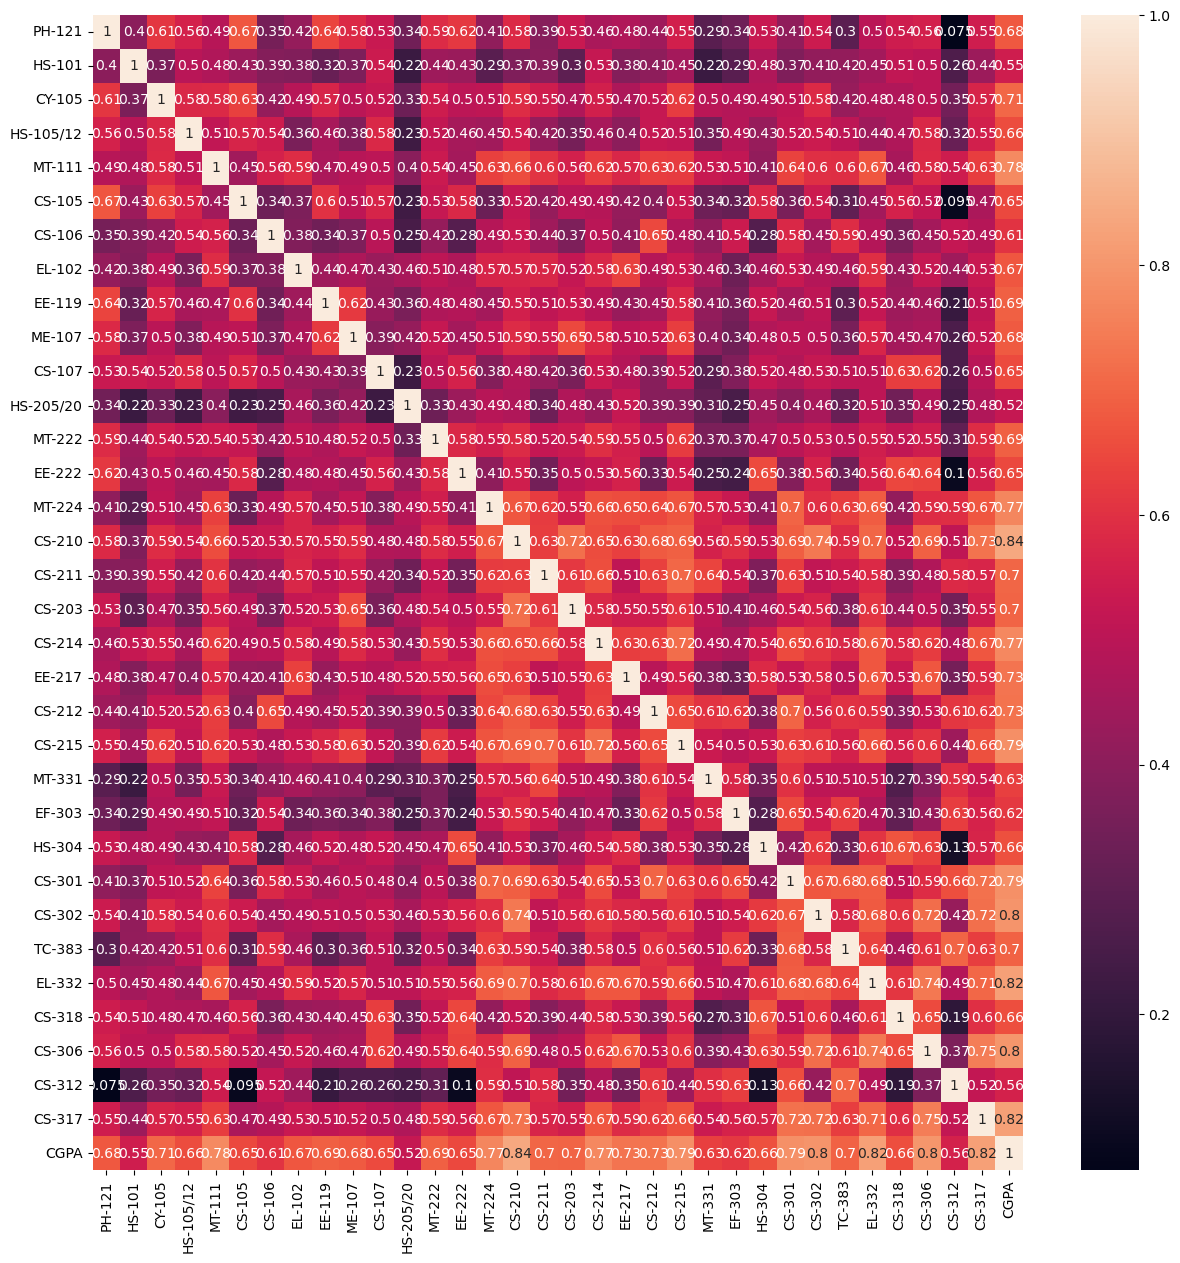

In [39]:
# To check Correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [40]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.039930,2.460245,3.407005,2.869002,2.986865,3.469702,2.883888,2.974956,2.964273,2.605079,...,2.641681,2.777058,3.023993,2.843783,2.827320,2.505604,2.845359,2.976182,2.503503,2.954888
std,1.282343,1.139165,1.255369,1.353411,1.265418,1.160797,1.106180,1.294829,1.119611,1.294086,...,1.143592,1.225453,1.134639,1.338909,1.266071,1.216698,1.244606,1.520432,1.167944,0.620552
min,0.000000,0.600000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,1.900000,1.600000,2.400000,1.600000,1.900000,2.800000,1.900000,1.900000,1.900000,1.300000,...,1.600000,1.600000,2.400000,1.600000,1.600000,1.600000,1.900000,1.600000,1.600000,2.538000
50%,3.300000,2.400000,3.900000,2.800000,3.300000,3.900000,2.800000,3.300000,3.300000,2.400000,...,2.800000,2.800000,3.300000,2.800000,2.800000,2.400000,2.800000,2.800000,2.400000,3.029000
75%,3.900000,3.300000,4.500000,3.900000,3.900000,4.500000,3.900000,3.900000,3.900000,3.900000,...,3.900000,3.900000,3.900000,3.900000,3.900000,3.300000,3.900000,4.500000,3.300000,3.451000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.985000


In [41]:
df.shape

(571, 34)

In [42]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.4,1.0,1.3,1.6,1.3,1.0,0.8,1.3,2.4,1.3,...,1.9,2.8,1.6,1.9,1.6,1.3,1.6,1.3,1.3,2.205
1,4.5,0.8,1.0,0.8,2.4,1.6,0.8,4.5,1.0,0.8,...,1.3,3.9,1.0,1.3,1.6,3.9,0.8,1.0,0.8,2.008
2,4.5,2.8,4.5,2.4,3.3,4.5,2.4,3.3,3.9,3.9,...,4.5,3.3,3.9,2.8,3.3,3.9,3.9,2.8,2.8,3.608
3,0.8,1.9,1.0,0.8,0.8,3.9,1.0,1.3,0.8,1.9,...,2.4,0.8,2.4,1.0,1.0,3.3,1.3,1.0,1.6,1.906
4,3.9,3.9,3.9,3.3,4.5,4.5,3.9,3.3,4.5,3.9,...,3.9,2.4,3.9,1.9,3.9,2.4,3.9,2.4,3.3,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2.8,4.5,4.5,3.9,5.0,4.5,3.9,3.9,5.0,3.3,...,3.9,3.9,4.5,5.0,4.5,4.5,3.3,3.9,3.9,3.798
567,5.0,4.5,4.5,4.5,4.5,4.5,4.5,3.9,4.5,4.5,...,4.5,4.5,4.5,4.5,4.5,5.0,3.9,3.3,3.3,3.772
568,2.8,4.5,3.9,3.3,4.5,4.5,4.5,4.5,4.5,2.8,...,2.4,3.3,3.3,4.5,2.8,1.9,3.3,3.9,2.8,3.470
569,4.5,3.3,0.8,4.5,0.8,1.0,2.4,1.3,2.4,1.3,...,1.6,1.6,1.9,1.3,0.8,2.4,3.3,0.8,2.8,2.193


# Machine Learning Implement

In [43]:
x=df.iloc[:,0:33]
y=df.iloc[:,33]

In [44]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.4,1.0,1.3,1.6,1.3,1.0,0.8,1.3,2.4,1.3,...,1.3,1.9,2.8,1.6,1.9,1.6,1.3,1.6,1.3,1.3
1,4.5,0.8,1.0,0.8,2.4,1.6,0.8,4.5,1.0,0.8,...,0.8,1.3,3.9,1.0,1.3,1.6,3.9,0.8,1.0,0.8
2,4.5,2.8,4.5,2.4,3.3,4.5,2.4,3.3,3.9,3.9,...,1.9,4.5,3.3,3.9,2.8,3.3,3.9,3.9,2.8,2.8
3,0.8,1.9,1.0,0.8,0.8,3.9,1.0,1.3,0.8,1.9,...,0.8,2.4,0.8,2.4,1.0,1.0,3.3,1.3,1.0,1.6
4,3.9,3.9,3.9,3.3,4.5,4.5,3.9,3.3,4.5,3.9,...,1.3,3.9,2.4,3.9,1.9,3.9,2.4,3.9,2.4,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2.8,4.5,4.5,3.9,5.0,4.5,3.9,3.9,5.0,3.3,...,2.8,3.9,3.9,4.5,5.0,4.5,4.5,3.3,3.9,3.9
567,5.0,4.5,4.5,4.5,4.5,4.5,4.5,3.9,4.5,4.5,...,4.5,4.5,4.5,4.5,4.5,4.5,5.0,3.9,3.3,3.3
568,2.8,4.5,3.9,3.3,4.5,4.5,4.5,4.5,4.5,2.8,...,2.8,2.4,3.3,3.3,4.5,2.8,1.9,3.3,3.9,2.8
569,4.5,3.3,0.8,4.5,0.8,1.0,2.4,1.3,2.4,1.3,...,0.8,1.6,1.6,1.9,1.3,0.8,2.4,3.3,0.8,2.8


In [45]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=.30)

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(399, 33)
(399,)
(172, 33)
(172,)


# Linear Regression

In [48]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
lr.coef_

array([ 0.02210246,  0.01304468,  0.01182371,  0.01701124,  0.04141053,
        0.0320019 ,  0.01023652,  0.01193948,  0.05494109,  0.01633597,
        0.02221455,  0.01262217,  0.01433112,  0.0096081 ,  0.03277425,
        0.0500218 , -0.00620783,  0.00326728,  0.00373022,  0.02535916,
        0.00235931,  0.01497379,  0.02416544,  0.00508364,  0.02636758,
        0.04069268,  0.02398853,  0.01450648,  0.03854326, -0.00749525,
        0.04490138,  0.02583112,  0.01905343])

In [50]:
lr.intercept_

0.985233858481386

In [51]:
lrpred=lr.predict(x_test)
print("Predicted Value", lrpred)
print("Actual Value", y_test)

Predicted Value [2.10196441 3.45046251 2.73186381 2.20707483 3.7803099  3.48509761
 2.58629017 2.26214915 2.22540972 2.9901844  3.48141536 2.81844764
 3.76624856 2.54878801 3.9429799  2.54384937 2.18609362 3.59879897
 2.08138111 2.41480802 2.38648502 3.8857574  2.36946537 2.59149695
 2.90047509 3.30946384 3.29841481 2.51880022 3.41441082 3.35364298
 2.60459456 2.79831281 3.49294988 3.31854263 3.73567133 3.0788776
 2.72745438 3.99157869 2.88592372 2.05593028 3.77493628 3.37858825
 3.80198076 3.69943562 3.21411346 2.37614143 2.76108038 2.99518273
 3.19033548 3.77274794 3.15342765 3.31669997 3.26647473 3.50124562
 3.36683685 2.96206451 3.90395618 3.72385939 3.71363035 2.68724664
 3.64759162 3.51389671 3.85912288 3.52919324 3.36098129 3.02164792
 3.44156111 3.30018121 2.94602786 2.36952867 3.58841245 3.3036787
 2.54320598 3.77969124 3.98737191 3.44238162 3.35130544 2.11884679
 3.89607396 2.83203098 2.44962685 2.94953162 1.58817675 2.65765518
 3.84230181 3.86380169 3.20778588 2.95753735 2.6

In [52]:
print('Mean Squared Error:', mse(y_test, lrpred))
print('Mean Absolute Error:', mae(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, lrpred)))
print('R2 Score:', r2_score(y_test, lrpred))

Mean Squared Error: 0.02365748459685392
Mean Absolute Error: 0.08445677075081413
Root Mean Squared Error: 0.15380989759067495
R2 Score: 0.9301879433764239


# Saving Model

In [53]:
import joblib
joblib.dump(lr,'Student_Grade_Prediction.obj')

['Student_Grade_Prediction.obj']